Họ và tên : Bùi Minh Tú

MSSV: 19146295

Lớp AI sáng thứ 4

BT: Nhận dạng khuôn mặt bản thân

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def loadData():
    file = open('/content/drive/MyDrive/AI/BT-CNN/face.data', 'rb')
    (images, labels) = pickle.load(file)
    file.close()
    print(images.shape)
    print(labels.shape)
    return images, labels

In [ ]:
X,y = loadData()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(760, 128, 128, 3)
(760, 1)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
19/19 [==============================] - 2s 59ms/step - loss: 0.7726 - accuracy: 0.6875 - val_loss: 0.4834 - val_accuracy: 0.7566
Epoch 2/10
19/19 [==============================] - 1s 46ms/step - loss: 0.2612 - accuracy: 0.9688 - val_loss: 0.1008 - val_accuracy: 1.0000
Epoch 3/10
19/19 [==============================] - 1s 46ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 4/10
19/19 [==============================] - 1s 46ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 5/10
19/19 [==============================] - 1s 47ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 6/10
19/19 [==============================] - 1s 47ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/10
19/19 [==============================] - 1s 47ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 8/10
19

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.4f'% score[0])
print('Test accuracy %.4f'% score[1])

Test loss: 0.0008
Test accuracy 1.0000


In [ ]:
model.save('Final.h5')

In [ ]:
from keras.models import load_model
model5=load_model('Final.h5')

In [ ]:
class_name = ['Không phải Bùi Minh Tú','Bùi Minh Tú']

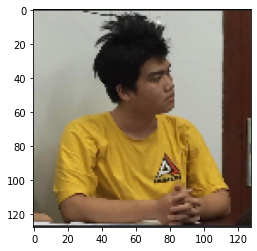

In [ ]:
img = load_img('việt.png',target_size=(128,128))
plt.imshow(img)
img = img_to_array(img)

In [ ]:
img=img.reshape(1,128,128,3)
img = img.astype('float32')
img = img / 255.0
class_name[np.argmax(model5.predict(img),axis=1)[0]]

'Không phải Bùi Minh Tú'